The json file consists of a dict object with two keys:
1. 'experiment_parameters' : dictionary
2. 'data' : list where each element is a dictionary


#### 'experiment_parameters' <br>
experiment_title : str <br>
iteration : int <br>
date : str <br>
experiment_start_time : str <br>
rail_material : str <br>
phantom_material : str <br>
compared_curvature : int <br>
first_grating_idx : int <br>
last_grating_idx : int <br>
wav0 : list, float <br>
local_time : str <br>

#### 'data': list, each element is a dict, keys are listed as follows: <br>
elapsed_time : float <br>
line_number : int <br>
wav_data : list, float <br>
curvatures : list, float <br>
positions_2d : nested list, float <br>
positions_3d : nested list, float <br>

# Loading in json file

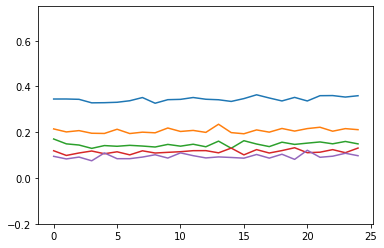

In [48]:
import json
import numpy as np
import matplotlib.pyplot as plt
from simple_segment import segment

folder1 = "exp1-ground_truth"
folder2 = "/bare_bare_"
string = ["30","50","70","90","110"]

for s in string:
    
    file = folder1 + folder2 + s + folder2 + s + "_iter1.json"

    with open(file, "r") as json_file:
        barebare = json.load(json_file)

    exp_params = barebare["experiment_parameters"]

    data = barebare["data"]

    # print('experiment params keys: ', exp_params.keys())
    # print()
    # print('data keys: ', data[0].keys())
    # print()
    # print('number of points: ', len(data))

    curvatures = data[0]['curvatures']

    plt.plot(curvatures)
    plt.ylim((-0.2,0.75));

# Piecewise Polynomial-Based Segmentation of Curvature

27


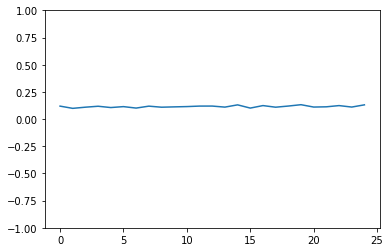

In [32]:
curvatures = data[0]['curvatures']


plt.plot(curvatures)
plt.ylim((-1,1))

print(len(data[10]['positions_3d']))

In [ ]:
def curv_err_thres(tolerance,num_of_segments_max,curvatures):
    """
    Inputs:
    tolerance (float) : predefined error to set as threshold
    num_of_segments (int) : max number of segments to iterate over
    curvatures (list) : list of curvatures

    Returns:
    force_locations (list) : force locations
    segments () : sequence of interconnected linear curvature segments
    """

    break_points = []
    segments_matrix = []
    error_vector = []

    for i in range(num_of_segments):

    return force_locations, segments

def force_mag_thres(min_force,num_of_segments,curvatures):
    """
    Inputs:
    min_force (float) : User defined minimum detectable force
    num_of_segments (int) : number of segments
    curvatures (list) : list of curvatures

    Returns:
    force_locations (list) : force locations
    segments () : sequence of interconnected linear curvature segments
    """

    force = 0

    while force < min_force:
        
    return force_locations, segments

# Model-based Estimation